In [28]:
import shap
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import load
from data_preprocess import preprocess_data

In [2]:
rf_model = load("C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/random_forest_model.pkl")
xgb_model = load("C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/xgboost_model.pkl")
nn_model = load("C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/neural_network_model.pkl")

<font color="bluegrey" size=+1.0><b>Preprocess</b></font>

In [3]:
file_path = 'C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

data = data.drop(columns=['id'])

target_column = 'stroke'

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

X_train_processed, X_test_processed, pipeline = preprocess_data(X_train, X_test, categorical_columns, numerical_columns)

Processed Training Data Shape: (4088, 18)
Processed Testing Data Shape: (1022, 18)


<font color="bluegrey" size=+1.0><b>Random Forest</b></font>

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
  0%|          | 0/1022 [00:00<?, ?it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
  0%|          | 1/1022 [00:00<11:34,  1.47it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted 

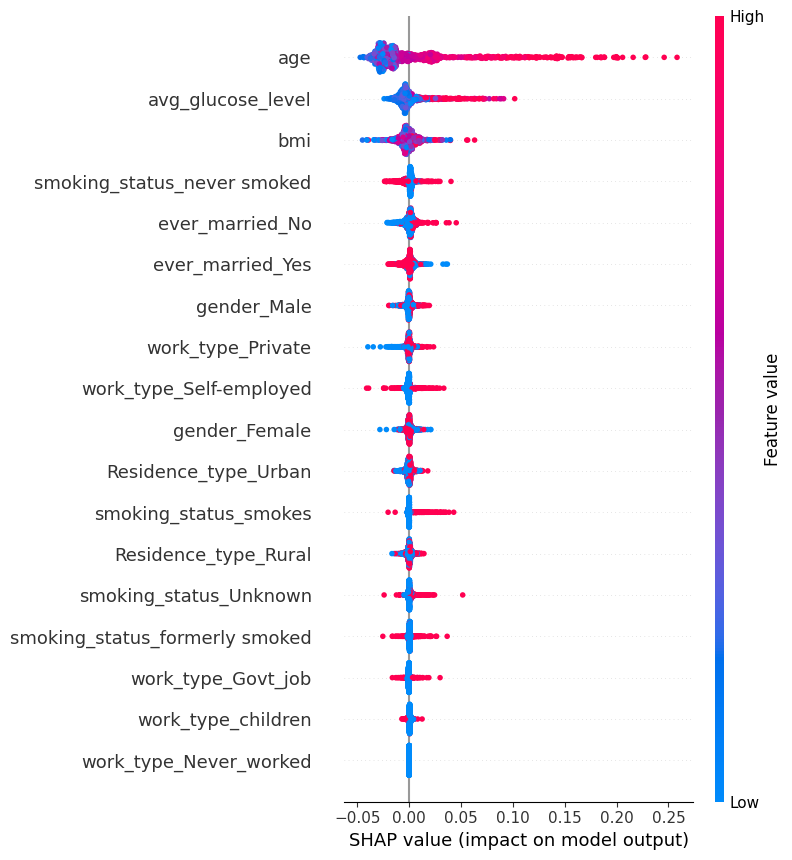

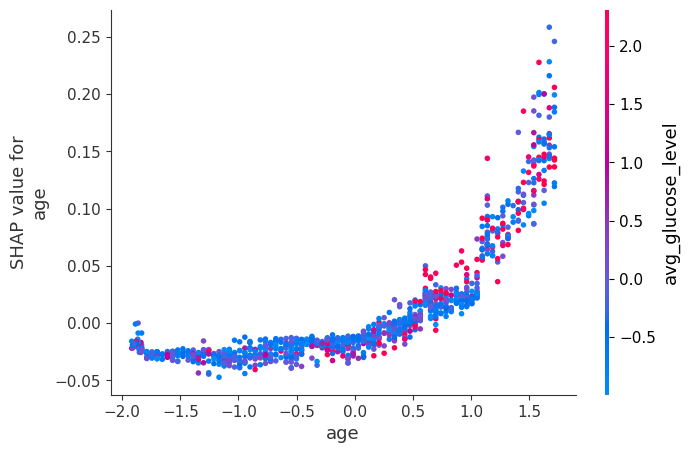

In [4]:
def predict_fn_rf(X):
    return rf_model.predict_proba(X)[:, 1]

background_kmeans = shap.kmeans(X_train_processed, 50)  # Create 50 clusters
explainer_rf = shap.KernelExplainer(predict_fn_rf, background_kmeans)

shap_values_rf = explainer_rf.shap_values(X_test_processed)

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names
shap.summary_plot(shap_values_rf, X_test_processed, feature_names=feature_names)
# PDP Plot
shap.dependence_plot('age', shap_values_rf, X_test_processed, feature_names=feature_names)

<font color="bluegrey" size=+1.0><b>XGBoost</b></font>

100%|██████████| 1022/1022 [10:36<00:00,  1.61it/s]


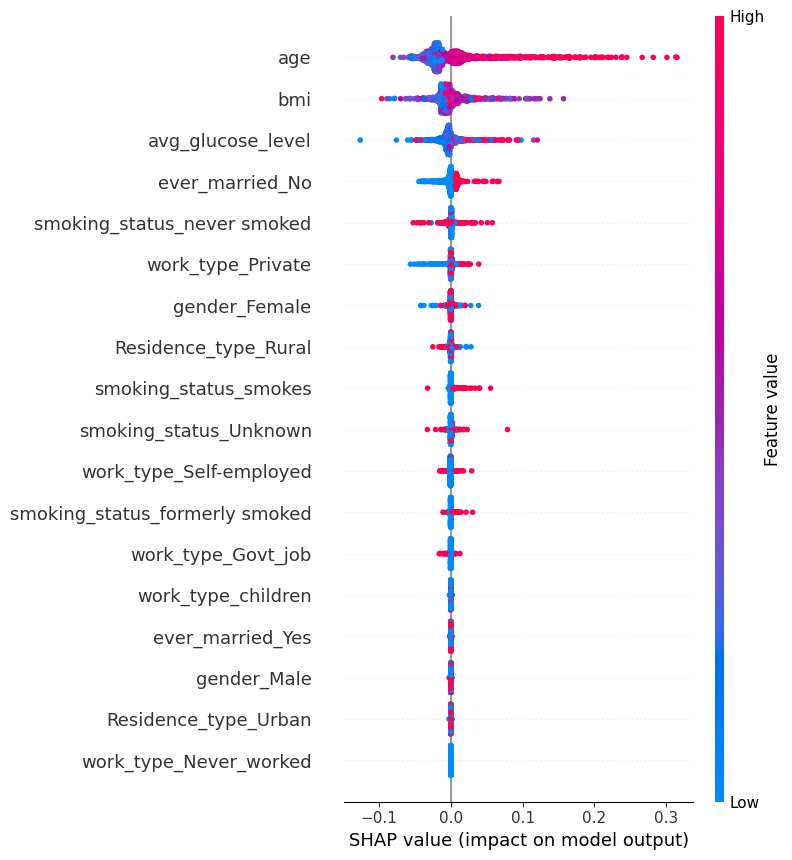

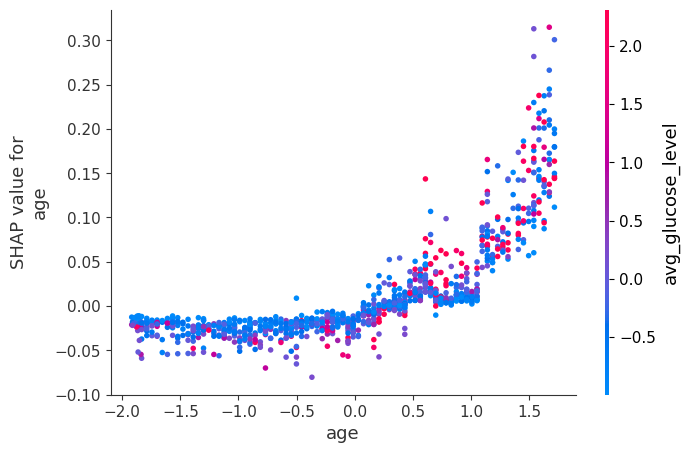

In [5]:
def predict_fn_xgb(X):
    return xgb_model.predict_proba(X)[:, 1]

background_kmeans = shap.kmeans(X_train_processed, 50)  # Create 50 clusters
explainer_xgb = shap.KernelExplainer(predict_fn_xgb, background_kmeans)

shap_values_xgb = explainer_xgb.shap_values(X_test_processed)

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names
shap.summary_plot(shap_values_xgb, X_test_processed, feature_names=feature_names)
# PDP Plot
shap.dependence_plot('age', shap_values_xgb, X_test_processed, feature_names=feature_names)

<font color="bluegrey" size=+1.0><b>Neural Network</b></font>

In [ ]:
def predict_fn_nn(X):
    return nn_model.predict(X).ravel()

background_kmeans = shap.kmeans(X_train_processed, 50)  # Create 50 clusters
explainer_nn = shap.KernelExplainer(predict_fn_nn, background_kmeans)

shap_values_nn = explainer_nn.shap_values(X_test_processed)

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names
shap.summary_plot(shap_values_nn, X_test_processed, feature_names=feature_names)
# PDP Plot
shap.dependence_plot('age', shap_values_nn, X_test_processed, feature_names=feature_names)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 


  0%|          | 0/1022 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step


  0%|          | 1/1022 [00:03<57:05,  3.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 540us/step


  0%|          | 2/1022 [00:06<51:28,  3.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 593us/step


  0%|          | 3/1022 [00:09<50:22,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 540us/step


  0%|          | 4/1022 [00:11<49:14,  2.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 537us/step


  0%|          | 5/1022 [00:14<48:29,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 539us/step


  1%|          | 6/1022 [00:17<48:12,  2.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 577us/step


  1%|          | 7/1022 [00:20<48:19,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 539us/step


  1%|          | 8/1022 [00:23<47:45,  2.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 566us/step


  1%|          | 9/1022 [00:26<48:47,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 559us/step


  1%|          | 10/1022 [00:29<48:41,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 540us/step


  1%|          | 11/1022 [00:31<47:55,  2.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step


  1%|          | 12/1022 [00:36<55:28,  3.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 578us/step


  1%|▏         | 13/1022 [00:39<53:58,  3.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 587us/step


  1%|▏         | 14/1022 [00:42<52:50,  3.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 579us/step


  1%|▏         | 15/1022 [00:45<51:52,  3.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 544us/step


  2%|▏         | 16/1022 [00:48<51:18,  3.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 538us/step


  2%|▏         | 17/1022 [00:50<50:05,  2.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 551us/step


  2%|▏         | 18/1022 [00:53<48:54,  2.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 627us/step


  2%|▏         | 19/1022 [00:56<49:58,  2.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 540us/step


  2%|▏         | 20/1022 [00:59<49:05,  2.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 552us/step


  2%|▏         | 21/1022 [01:02<48:17,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step


  2%|▏         | 22/1022 [01:05<49:15,  2.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3254/3254 ━━━━━━━━━━━━━━━━━━━━ 2s 533us/step
